<a target="_blank" href="https://colab.research.google.com/github/TuragaLab/jhu-janelia-ml-demo/blob/main/stable_diffusion.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
!pip install diffusers
!pip install transformers scipy ftfy accelerate safetensors invisible-watermark>=0.2.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 18.5 MB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt
from diffusers import StableDiffusionXLPipeline
import torch

In [4]:
pipe = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipe.enable_model_cpu_offload()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [5]:
def generate_and_show_images(prompt: str, negative_prompt: str = "low quality, bad quality", num_variations: int = 3):
    images = pipe(
        prompt=[prompt] * num_variations,
        negative_prompt=[negative_prompt] * num_variations,
        guidance_scale=5,
        num_inference_steps=50
    ).images
    fig, axes = plt.subplots(nrows=1, ncols=num_variations, dpi=150)
    for image, ax in zip(images, axes):
      ax.imshow(image)
      ax.axis("off")
    plt.tight_layout()
    plt.show()
    del fig
    del axes

In [6]:
num_variations = 3
prompt = "a fruit fly sitting at a computer programming a physics simulation of a human, photorealistic, detailed, 8k"
negative_prompt = "low quality, bad quality"
images = pipe(prompt=[prompt] * num_variations, negative_prompt=[negative_prompt] * num_variations, guidance_scale=5).images

  0%|          | 0/50 [00:00<?, ?it/s]

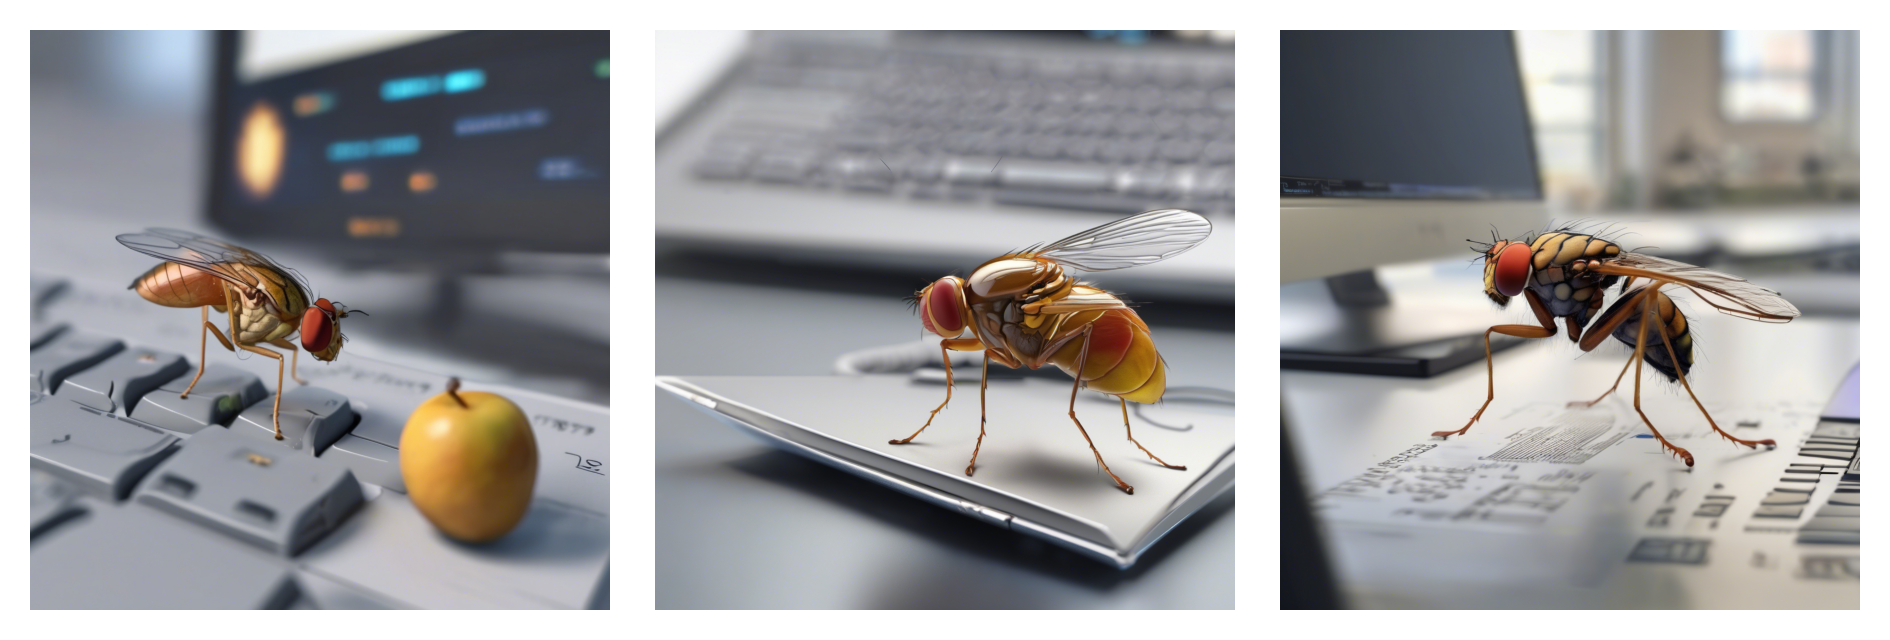

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=num_variations, dpi=300)
for image, ax in zip(images, axes):
  ax.imshow(image)
  ax.axis("off")
plt.tight_layout()
plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

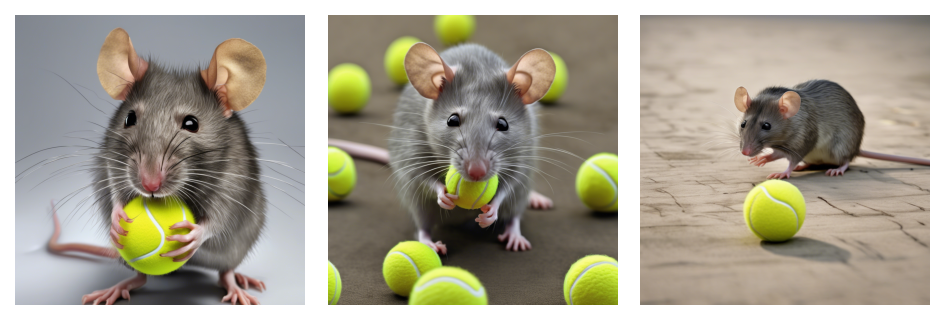

In [8]:
generate_and_show_images("photograph of a rat and tennis ball, photorealistic, detailed, 8k")